<a href="https://colab.research.google.com/github/NienkeH/Creating-maps-in-R/blob/master/01-introduction-cook-books/01_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install "numpy<2,>=1.13" "pandas~=1.1" "matplotlib<4,>=2.1" "scipy<2,>=0.18" "scikit-learn>=0.19" "mpl-axes-aligner<2,>=1.1"

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.1 MB/s eta 0:00:00
  Created wheel for mpl-axes-aligner: filename=mpl_axes_aligner-1.3-py3-none-any.whl size=4755 sha256=6615658d73277a06d82d933f8ac6338e3719c7eb1aad6a01dadc763732a2b627
  Stored in directory: /root/.cache/pip/wheels/7d/57/ec/c27bcb29ff0f39ee5a71ed59474a92503b2a0112f4a283429b
Successfully built mpl-axes-aligner
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have 

In [3]:
!git clone https://github.com/CANAL-amsterdam/Foundations-of-Cultural-and-Social-Data-Analysis
%cd Foundations-of-Cultural-and-Social-Data-Analysis/01-introduction-cook-books
!ls

Cloning into 'Foundations-of-Cultural-and-Social-Data-Analysis'...
remote: Enumerating objects: 1019, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 1019 (delta 38), reused 21 (delta 6), pack-reused 921 (from 1)
Receiving objects: 100% (1019/1019), 204.51 MiB | 16.67 MiB/s, done.
Resolving deltas: 100% (117/117), done.
Updating files: 100% (41/41), done.
/content/Foundations-of-Cultural-and-Social-Data-Analysis/01-introduction-cook-books
01_chapter.ipynb  01_exercises.ipynb  data


In [4]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.feature_selection import chi2

In [5]:
def plot_trend(column, df, line_color='grey', xlim=(1810, 1930)):
    slope, intercept, _, _, _ = scipy.stats.linregress(
        df.index, df[column].fillna(0).values)
    ax = df[column].plot(style='o', label=column)
    ax.plot(df.index, intercept + slope * df.index, '--',
             color=line_color, label='_nolegend_')
    ax.set_ylabel("fraction of recipes")
    ax.set_xlabel("year of publication")
    ax.set_xlim(xlim)

In [6]:
import pandas as pd

df = pd.read_csv("data/feeding-america.csv", index_col='date')

In [7]:
print(df['region'].unique())

['ethnic' 'general' 'northeast' 'midwest' 'west' 'south']


In [8]:
df['region'].value_counts()

,region
general,35508
ethnic,7040
midwest,2043
northeast,1320
south,1094
west,1027


<Axes: >

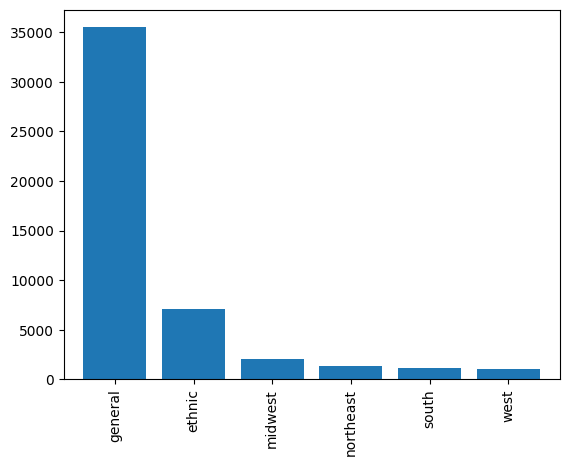

In [9]:
df['region'].value_counts().plot(kind='bar', width=0.8)

In [10]:
ingredients = df['ingredients'].str.split(';')
groups = ingredients.groupby('date')
ingredients = groups.sum()
ingredients = ingredients.apply(pd.Series.value_counts)
grouped = df.groupby('date')
recipe_counts = grouped.size()
ingredients = ingredients.divide(recipe_counts, 0)

In [11]:
ingredients.head()

,butter,salt,water,flour,nutmeg,pepper,sugar,lemon,mace,egg,...,tomato in hot water,farina cream,pearl grit,chicken okra,tournedo,avocado,rock cod fillet,perch fillet,lime yeast,dried flower
date,,,,,,,,,,,,,,,,,,,,,
1803,0.570796,0.435841,0.409292,0.351770,0.272124,0.267699,0.205752,0.205752,0.188053,0.150442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,0.357374,0.349839,0.395048,0.219591,0.132400,0.194833,0.274489,0.104413,0.134553,0.177610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,0.531401,0.371981,0.391304,0.352657,0.260870,0.149758,0.396135,0.115942,0.140097,0.294686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,0.398551,0.315217,0.322464,0.431159,0.152174,0.083333,0.387681,0.018116,0.036232,0.347826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1827,NaN,0.066667,0.600000,NaN,0.033333,0.033333,0.400000,0.200000,NaN,0.033333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import scipy.stats

def plot_trend(column, df, line_color='grey', xlim=(1810, 1930)):
    slope, intercept, _, _, _ = scipy.stats.linregress(
        df.index, df[column].fillna(0).values)
    ax = df[column].plot(style='o', label=column)
    ax.plot(df.index, intercept + slope * df.index, '--',
             color=line_color, label='_nolegend_')
    ax.set_ylabel("fraction of recipes")
    ax.set_xlabel("year of publication")
    ax.set_xlim(xlim)

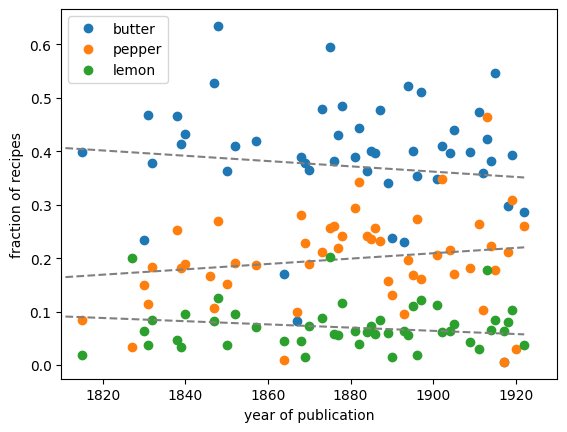

In [18]:
plot_trend('butter', ingredients)
plot_trend('pepper', ingredients)
plot_trend('lemon', ingredients)
plt.legend()

In [19]:
from sklearn.feature_selection import chi2

labels = [p[]]

## Exercises

### Easy
1. Load the cookbook data set, and extract the "region" column. Print the number of unique
   regions in the data set.
2. Using the same "region" column, produce a frequency distribution of the regions in the
   data.
3. Create a bar plot of the different regions annotated in the dataset.

### Moderate
1. Use the function `plot_trend()` to create a time series plot for three or more ingredients of your
   own choice.
2. Go back to section `Taste Trends in Culinary US History`. Create a bar plot of
   the ten most distinctive ingredients for the pre- and postwar era using as keyness
   measure the Pearson's $\chi^2$ test statistic.
3. With the invention of baking powder, cooking efficiency went up. Could there be a
   relationship between the increased use of baking powder and the number of recipes
   describing cakes, sweets, and bread? (The latter recipes have the value `"breadsweets"`
   in the `recipe_class` column in the original data.) Produce two time series plots: one
   for the absolute number of recipes involving baking powder as ingredient, and a second
   plotting the absolute number `"breadsweets"` recipes over time.

### Challenging
1. Use the code to produce the scatter plot from section
   `Taste Trends in Culinary US History`, and experiment with different time frame
   settings to find distinctive words for other time periods. For example, can you compare
   twentieth-century recipes to nineteenth-century recipes?
2. Adapt the scatter plot code from section
   `America's Culinary Melting Pot` to find distinctive ingredients for
   two specific ethnic groups. (You could, for instance, contrast typical ingredients from
   the Jewish cuisine with those from the Creole culinary tradition.) How do these results
   differ from the ethnicity plot we created before? (Hint: For this
   exercise, you could simply adapt the very final code block of the chapter and use the
   somewhat simplified keyness measure proposed there.)
3. Use the "region" column to create a scatter plot of distinctive ingredients in the
   northeast of the United States versus the ingredients used in the midwest. To make
   things harder on yourself, you could use Pearson's $\chi^2$ test statistic as a keyness
   measure.